<a href="https://colab.research.google.com/github/flora0110/spotify_segment_headine/blob/main/Textsplit_HowTo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install word2vec

     |████████████████████████████████| 42 kB 1.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for word2vec: filename=word2vec-0.11.1-py2.py3-none-any.whl size=156420 sha256=d15314463ea365e8d3295b8fb1eb727672ab19de69d27958196ae33105f33dd4
  Stored in directory: /root/.cache/pip/wheels/c9/c0/d4/29d797817e268124a32b6cf8beb8b8fe87b86f099d5a049e61
Successfully built word2vec


In [ ]:
import os
#import word2vec
from gensim.models.word2vec import Word2Vec
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

## Download toy corpus for wordvector training and example text

In [ ]:
corpus_path = './text8'  # be sure your corpus is cleaned from punctuation and lowercased
if not os.path.exists(corpus_path):
    !wget http://mattmahoney.net/dc/text8.zip
    !unzip {corpus_path}

links = {'tale2cities': 'https://www.gutenberg.org/files/98/98-0.txt',  # a tale of two cities
         'siddartha': 'http://www.gutenberg.org/cache/epub/2500/pg2500.txt'}  # siddartha

for link in links.values():
    text_path = os.path.basename(link)
    if not os.path.exists(text_path):
        !wget {link}

--2022-03-06 19:19:16--  http://mattmahoney.net/dc/text8.zip
Resolving mattmahoney.net (mattmahoney.net)... 67.195.197.24
Connecting to mattmahoney.net (mattmahoney.net)|67.195.197.24|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31344016 (30M) [application/zip]
Saving to: ‘text8.zip’

text8.zip           100%[===================>]  29.89M  3.47MB/s    in 8.5s    

2022-03-06 19:19:24 (3.50 MB/s) - ‘text8.zip’ saved [31344016/31344016]

Archive:  ./text8.zip
  inflating: text8                   
--2022-03-06 19:19:26--  https://www.gutenberg.org/files/98/98-0.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 807231 (788K) [text/plain]
Saving to: ‘98-0.txt’

98-0.txt            100%[===================>] 788.31K  --.-KB/s    in 0.07s   

2022-03-06 19:19:26 (11.3 MB/s) - 

In [ ]:
corpus_path
with open('./text8','r',encoding='utf-8') as file:
    for line in file.readlines():
        print(len(line))

100000000


In [ ]:
from gensim.models import word2vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
sentences = word2vec.Text8Corpus('./text8')
model = Word2Vec(sentences, sg=1, size=200,  window=15,  min_count=5,  negative=3, sample=0.001, hs=1, workers=4)
model.save('/text82.model')
print(model['man'])

2022-03-06 19:14:14,899 : INFO : collecting all words and their counts
2022-03-06 19:14:14,904 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-03-06 19:14:22,312 : INFO : collected 253854 word types from a corpus of 17005207 raw words and 1701 sentences
2022-03-06 19:14:22,315 : INFO : Loading a fresh vocabulary
2022-03-06 19:14:22,701 : INFO : effective_min_count=5 retains 71290 unique words (28% of original 253854, drops 182564)
2022-03-06 19:14:22,703 : INFO : effective_min_count=5 leaves 16718844 word corpus (98% of original 17005207, drops 286363)
2022-03-06 19:14:22,941 : INFO : deleting the raw counts dictionary of 253854 items
2022-03-06 19:14:22,953 : INFO : sample=0.001 downsamples 38 most-common words
2022-03-06 19:14:22,956 : INFO : downsampling leaves estimated 12506280 word corpus (74.8% of prior 16718844)
2022-03-06 19:14:23,095 : INFO : constructing a huffman tree from 71290 words
2022-03-06 19:14:25,419 : INFO : built huffman tree with m

[-0.22645624  0.10052659  0.02688889 -0.16656658  0.02604794 -0.01937369
  0.07639001  0.07546333 -0.05753879 -0.06673123 -0.03140279  0.01852513
 -0.0813071   0.03833107 -0.00664844 -0.1749449  -0.02240312  0.28810242
  0.04446505  0.00389863 -0.04336544  0.00994006 -0.07303789  0.06017723
 -0.0522999   0.05078684  0.00733278  0.02666984 -0.3257318  -0.10586351
 -0.0237381   0.0020833   0.16847274 -0.04068791 -0.04593707  0.11158828
  0.05507594  0.07468643  0.0718132   0.23928703  0.06299663 -0.19911031
  0.08342277  0.04730172  0.02216617  0.04860901  0.16553603 -0.20947824
  0.22172461  0.24354449 -0.09401459 -0.13271025 -0.14867847  0.07279087
  0.06539205 -0.0387186   0.00054159  0.09229204  0.07771023 -0.05691187
  0.07472182 -0.18187074 -0.00091383 -0.11247518  0.31256154  0.03762604
  0.32367876  0.16823864  0.04330464  0.08117311 -0.04758301 -0.06726243
  0.1222311  -0.29620856 -0.17088492 -0.16022323  0.05469684 -0.03083099
 -0.03719184  0.00797373  0.16229044 -0.09074484 -0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


## Train wordvectors

In [ ]:
from gensim.models import word2vec
import logging
wrdvec_path = 'wrdvecs.bin'
if not os.path.exists(wrdvec_path):
  sentences = word2vec.Text8Corpus('./text8')
  model = word2vec.Word2Vec(sentences, cbow_mean=1, iter=5, hs=1, sample=0.00001, window=15, size=200)
  #word2vec.Word2Vec(corpus_path, wrdvec_path, cbow=1, iter_=5, hs=1, threads=8, sample='1e-5', window=15, size=200, binary=1)

2022-03-06 19:30:05,292 : INFO : collecting all words and their counts
2022-03-06 19:30:05,295 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-03-06 19:30:09,798 : INFO : collected 253854 word types from a corpus of 17005207 raw words and 1701 sentences
2022-03-06 19:30:09,804 : INFO : Loading a fresh vocabulary
2022-03-06 19:30:10,001 : INFO : effective_min_count=5 retains 71290 unique words (28% of original 253854, drops 182564)
2022-03-06 19:30:10,002 : INFO : effective_min_count=5 leaves 16718844 word corpus (98% of original 17005207, drops 286363)
2022-03-06 19:30:10,193 : INFO : deleting the raw counts dictionary of 253854 items
2022-03-06 19:30:10,203 : INFO : sample=1e-05 downsamples 3854 most-common words
2022-03-06 19:30:10,206 : INFO : downsampling leaves estimated 5567692 word corpus (33.3% of prior 16718844)
2022-03-06 19:30:10,290 : INFO : constructing a huffman tree from 71290 words
2022-03-06 19:30:12,041 : INFO : built huffman tree with 

In [ ]:
model.save('/text8.model')

2022-03-06 19:33:25,905 : INFO : saving Word2Vec object under /text8.model, separately None
2022-03-06 19:33:25,907 : INFO : storing np array 'vectors' to /text8.model.wv.vectors.npy
2022-03-06 19:33:25,955 : INFO : not storing attribute vectors_norm
2022-03-06 19:33:25,957 : INFO : storing np array 'syn1' to /text8.model.trainables.syn1.npy
2022-03-06 19:33:25,996 : INFO : storing np array 'syn1neg' to /text8.model.trainables.syn1neg.npy
2022-03-06 19:33:26,050 : INFO : not storing attribute cum_table
2022-03-06 19:33:26,973 : INFO : saved /text8.model


In [29]:
model = word2vec.Word2Vec.load('/text8.model')
wrdvecs = pd.DataFrame(model.wv.vectors, index=model.wv.vocab)
# del model
print(wrdvecs.shape)

2022-03-06 20:13:10,903 : INFO : loading Word2Vec object from /text8.model
2022-03-06 20:13:11,566 : INFO : loading wv recursively from /text8.model.wv.* with mmap=None
2022-03-06 20:13:11,567 : INFO : loading vectors from /text8.model.wv.vectors.npy with mmap=None
2022-03-06 20:13:11,586 : INFO : setting ignored attribute vectors_norm to None
2022-03-06 20:13:11,587 : INFO : loading vocabulary recursively from /text8.model.vocabulary.* with mmap=None
2022-03-06 20:13:11,590 : INFO : loading trainables recursively from /text8.model.trainables.* with mmap=None
2022-03-06 20:13:11,592 : INFO : loading syn1 from /text8.model.trainables.syn1.npy with mmap=None
2022-03-06 20:13:11,613 : INFO : loading syn1neg from /text8.model.trainables.syn1neg.npy with mmap=None
2022-03-06 20:13:11,634 : INFO : setting ignored attribute cum_table to None
2022-03-06 20:13:11,635 : INFO : loaded /text8.model


(71290, 200)


## get sentence tokenizer

In [ ]:
!pip install textsplit

     |████████████████████████████████| 154 kB 32.4 MB/s 


In [ ]:
from textsplit.tools import SimpleSentenceTokenizer
sentence_tokenizer = SimpleSentenceTokenizer()

## run get_penalty and split_optimal

In [ ]:
%matplotlib inline
from textsplit.tools import get_penalty, get_segments
from textsplit.algorithm import split_optimal, split_greedy, get_total

penalty 41.96
8590 sentences, 380 segments, avg 22.61 sentences per segment
optimal score 271126.78, greedy score 270364.07
ratio of scores 1.0028


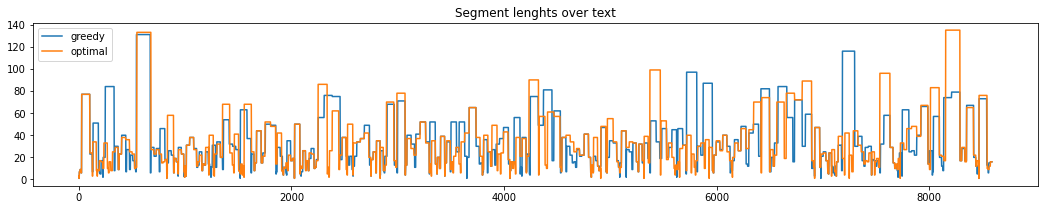

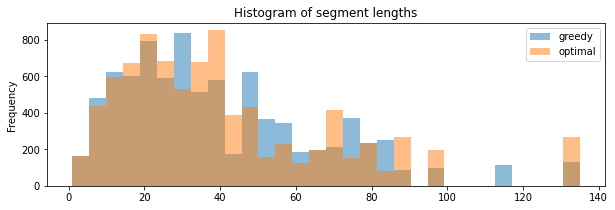

In [30]:
# link = links['siddartha']
link = links['tale2cities']
segment_len = 30  # segment target length in sentences
book_path = os.path.basename(link)

with open(book_path, 'rt') as f:
    text = f.read()  #.replace('\n', ' ')  # punkt tokenizer handles newlines not so nice

sentenced_text = sentence_tokenizer(text)
vecr = CountVectorizer(vocabulary=wrdvecs.index)

sentence_vectors = vecr.transform(sentenced_text).dot(wrdvecs)

penalty = get_penalty([sentence_vectors], segment_len)
print('penalty %4.2f' % penalty)

optimal_segmentation = split_optimal(sentence_vectors, penalty, seg_limit=250)
segmented_text = get_segments(sentenced_text, optimal_segmentation)

print('%d sentences, %d segments, avg %4.2f sentences per segment' % (
    len(sentenced_text), len(segmented_text), len(sentenced_text) / len(segmented_text)))

with open(book_path + '.seg', 'wt') as f:
    for i, segment_sentences in enumerate(segmented_text):
        segment_str = ' // '.join(segment_sentences)
        gain = optimal_segmentation.gains[i] if i < len(segmented_text) - 1 else 0
        segment_info = ' [%d sentences, %4.3f] ' % (len(segment_sentences), gain) 
        print(segment_str + '\n8<' + '=' * 30 + segment_info + "=" * 30, file=f)

greedy_segmentation = split_greedy(sentence_vectors, max_splits=len(optimal_segmentation.splits))
greedy_segmented_text = get_segments(sentenced_text, greedy_segmentation)
lengths_optimal = [len(segment) for segment in segmented_text for sentence in segment]
lengths_greedy = [len(segment) for segment in greedy_segmented_text for sentence in segment]
df = pd.DataFrame({'greedy':lengths_greedy, 'optimal': lengths_optimal})
df.plot.line(figsize=(18, 3), title='Segment lenghts over text')
df.plot.hist(bins=30, alpha=0.5, figsize=(10, 3), title='Histogram of segment lengths')

totals = [get_total(sentence_vectors, seg.splits, penalty) 
          for seg in [optimal_segmentation, greedy_segmentation]]
print('optimal score %4.2f, greedy score %4.2f' % tuple(totals))
print('ratio of scores %5.4f' % (totals[0] / totals[1]))

## Evaluation

If you look into the written file `book_path`.seg, the snippet line is often at the boundary of a paragraph.  The word embeddings computed above are neither very good nor adapted to the text. Every unknown word has a zero vector. Choosing some more or less random vector for unknown words might improve the accuracy given those unknown terms appear repeatedly within a section.